In [4]:
pip install h2o

     |████████████████████████████████| 164.6MB 30kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.5-py2.py3-none-any.whl size=164673888 sha256=c63216866783fad01dbaf2fc5cfe269eae4a10b635b18fbe7220a13172e01bef
  Stored in directory: /root/.cache/pip/wheels/f7/54/f6/f88d58b676e135bbab981238fcf77f27161ec02b7cc893d8c7
Successfully built h2o


In [45]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,39 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.5
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_c4f5yn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.161 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [46]:
import pandas as pd
import numpy as np
np.random.seed(1337) # for reproducibility

In [47]:
data=pd.read_csv('preprocesseddata.csv')

In [48]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,train_size=0.8,random_state=0)

In [49]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [50]:
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [51]:
train

Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept-Human Resouces,Dept-Research & Development,Dept-Sales,EducationField-Human Resources,EducationField-Life Sciences,EducationField-Marketing,EducationField-Medical,EducationField-Other,EducationField-Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
58,0,2,21,3,4,0,3,4,4,3,17875,4,1,13,3,3,1,29,2,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
45,0,2,28,3,4,1,3,1,4,3,2132,4,0,20,4,4,1,8,3,3,5,4,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
40,0,2,26,3,3,1,3,2,1,3,8396,1,0,14,3,2,1,8,3,2,7,7,7,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,0,1,8,4,1,1,2,3,1,1,7587,1,0,15,3,2,0,10,1,3,10,7,0,9,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
25,1,3,24,1,3,1,1,1,4,1,1118,1,1,14,3,4,0,1,4,3,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
52,0,2,4,2,4,0,3,4,4,3,16555,2,0,13,3,4,0,31,2,1,5,2,1,4,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
47,0,2,9,4,2,0,3,1,3,1,2105,4,0,12,3,3,0,7,2,3,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
26,0,2,17,4,4,1,1,1,3,3,2305,1,0,15,3,3,3,3,3,4,3,2,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
24,0,1,13,2,4,0,3,1,2,3,2033,1,0,13,3,3,1,1,2,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
27,0,2,1,2,3,0,3,3,1,3,7412,1,0,11,3,4,0,9,3,3,9,7,0,7,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
x = train.columns
y = "Attrition"
x.remove(y)

In [53]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [54]:
aml = H2OAutoML(max_models=40, seed=1,verbosity="info")
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
09:55:26.685: Project: AutoML_20210319_95526685
09:55:26.686: Setting stopping tolerance adaptively based on the training frame: 0.029160592175990215
09:55:26.686: Build control seed: 1
09:55:26.687: training frame: Frame key: automl_training_py_319_sid_8624    cols: 43    rows: 1176  chunks: 8    size: 57390  checksum: -460652497392515904
09:55:26.687: validation frame: NULL
09:55:26.687: leaderboard frame: NULL
09:55:26.687: blending frame: NULL
09:55:26.687: response column: Attrition
09:55:26.687: fold column: null
09:55:26.687: weights column: null
09:55:26.687: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
09:55:26.688: AutoML job created: 2021.03.19 09:55:26.685
09:55:26.689: AutoML build started: 2021.03.19 09:55:26.689
09:55:26.

In [55]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20210319_095526_model_1,0.837357,0.319802,0.609676,0.238802,0.305811,0.0935202
StackedEnsemble_BestOfFamily_AutoML_20210319_095526,0.83687,0.301567,0.652458,0.230209,0.295518,0.0873307
StackedEnsemble_AllModels_AutoML_20210319_095526,0.83056,0.308226,0.636741,0.229186,0.2994,0.0896401
XGBoost_grid__1_AutoML_20210319_095526_model_9,0.82997,0.324921,0.606539,0.256299,0.307198,0.0943706
XGBoost_grid__1_AutoML_20210319_095526_model_5,0.827343,0.325788,0.609031,0.247814,0.306455,0.0939148
XGBoost_grid__1_AutoML_20210319_095526_model_3,0.822915,0.328112,0.598294,0.228271,0.30941,0.0957348
GLM_1_AutoML_20210319_095526,0.822277,0.330172,0.628944,0.269102,0.306709,0.0940701
XGBoost_2_AutoML_20210319_095526,0.821109,0.328804,0.589495,0.272386,0.310017,0.0961104
GBM_5_AutoML_20210319_095526,0.821055,0.337032,0.5835,0.284165,0.316216,0.0999924
GBM_grid__1_AutoML_20210319_095526_model_1,0.820527,0.340547,0.550585,0.270857,0.318563,0.101483


In [56]:
preds = aml.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [57]:
preds

predict,p0,p1
0,0.89694,0.10306
0,0.986282,0.0137178
0,0.833979,0.166021
0,0.875962,0.124038
1,0.10384,0.89616
0,0.741298,0.258702
1,0.608974,0.391026
0,0.870364,0.129636
0,0.988332,0.0116679
0,0.840359,0.159641


In [58]:
test

Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept-Human Resouces,Dept-Research & Development,Dept-Sales,EducationField-Human Resources,EducationField-Life Sciences,EducationField-Marketing,EducationField-Medical,EducationField-Other,EducationField-Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
36,0,1,10,4,2,1,3,3,4,1,9980,1,0,14,3,4,0,10,3,2,10,3,9,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
33,0,2,25,3,4,1,2,2,2,1,4320,1,0,13,3,4,0,5,2,3,5,3,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
35,1,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,2,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
40,0,2,20,4,1,1,3,3,4,3,10322,4,0,20,4,4,1,14,6,3,11,10,11,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
29,1,3,24,2,4,1,2,1,4,1,2439,1,1,24,4,2,0,1,3,2,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
30,0,3,3,3,3,0,3,1,3,2,2083,1,0,20,4,3,1,1,2,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
34,1,2,24,4,1,0,2,2,2,1,4599,0,1,23,4,3,0,16,2,4,15,9,10,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
33,0,1,2,3,4,0,3,2,2,1,5147,8,0,15,3,4,0,13,2,2,11,7,1,7,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
50,0,1,1,3,4,0,3,2,3,3,6347,0,0,12,3,1,1,19,3,3,18,7,0,13,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
56,1,2,14,4,2,0,3,1,2,3,4963,9,1,18,3,1,3,7,2,3,5,4,4,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
data_as_df = preds.as_data_frame()

In [60]:
y_pred=data_as_df.predict
y_test=pd.read_csv('test.csv').Attrition

In [61]:
# XGBOOST
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.4943820224719101

In [105]:
# Ensembled model 
a=h2o.get_model('StackedEnsemble_BestOfFamily_AutoML_20210319_095526')

In [106]:
pr=a.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [107]:
data_as_df = pr.as_data_frame()

In [108]:
y_pred=data_as_df.predict
y_test=pd.read_csv('test.csv').Attrition

In [109]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6021505376344085

In [110]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.5714285714285714

In [112]:
# Ensembled model 
a=h2o.get_model('StackedEnsemble_AllModels_AutoML_20210319_095526')

In [113]:
pr=a.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [114]:
data_as_df = pr.as_data_frame()

In [115]:
y_pred=data_as_df.predict
y_test=pd.read_csv('test.csv').Attrition

In [116]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6086956521739131

In [117]:
from sklearn.metrics import recall_score


In [118]:
recall_score(y_test,y_pred)

0.5714285714285714

In [119]:
my_mojo_all_model_ensemble = a.download_mojo()

In [120]:
my_local_model = h2o.download_model(a)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid__1_AutoML_20210319_095526_model_1,0.837357,0.319802,0.609676,0.238802,0.305811,0.0935202,228,0.015154,XGBoost
StackedEnsemble_BestOfFamily_AutoML_20210319_095526,0.83687,0.301567,0.652458,0.230209,0.295518,0.0873307,500,0.046245,StackedEnsemble
StackedEnsemble_AllModels_AutoML_20210319_095526,0.83056,0.308226,0.636741,0.229186,0.2994,0.0896401,1589,0.86069,StackedEnsemble
XGBoost_grid__1_AutoML_20210319_095526_model_9,0.82997,0.324921,0.606539,0.256299,0.307198,0.0943706,272,0.012445,XGBoost
XGBoost_grid__1_AutoML_20210319_095526_model_5,0.827343,0.325788,0.609031,0.247814,0.306455,0.0939148,266,0.009611,XGBoost
XGBoost_grid__1_AutoML_20210319_095526_model_3,0.822915,0.328112,0.598294,0.228271,0.30941,0.0957348,386,0.026024,XGBoost
GLM_1_AutoML_20210319_095526,0.822277,0.330172,0.628944,0.269102,0.306709,0.0940701,1135,0.02429,GLM
XGBoost_2_AutoML_20210319_095526,0.821109,0.328804,0.589495,0.272386,0.310017,0.0961104,307,0.021896,XGBoost
GBM_5_AutoML_20210319_095526,0.821055,0.337032,0.5835,0.284165,0.316216,0.0999924,1020,0.019256,GBM
GBM_grid__1_AutoML_20210319_095526_model_1,0.820527,0.340547,0.550585,0.270857,0.318563,0.101483,661,0.021161,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid__1_AutoML_20210319_095526_model_1


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32118546962738037: 


,,0,1,Error,Rate
0,0,945.0,43.0,0.0435,(43.0/988.0)
1,1,45.0,143.0,0.2394,(45.0/188.0)
2,Total,990.0,186.0,0.0748,(88.0/1176.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

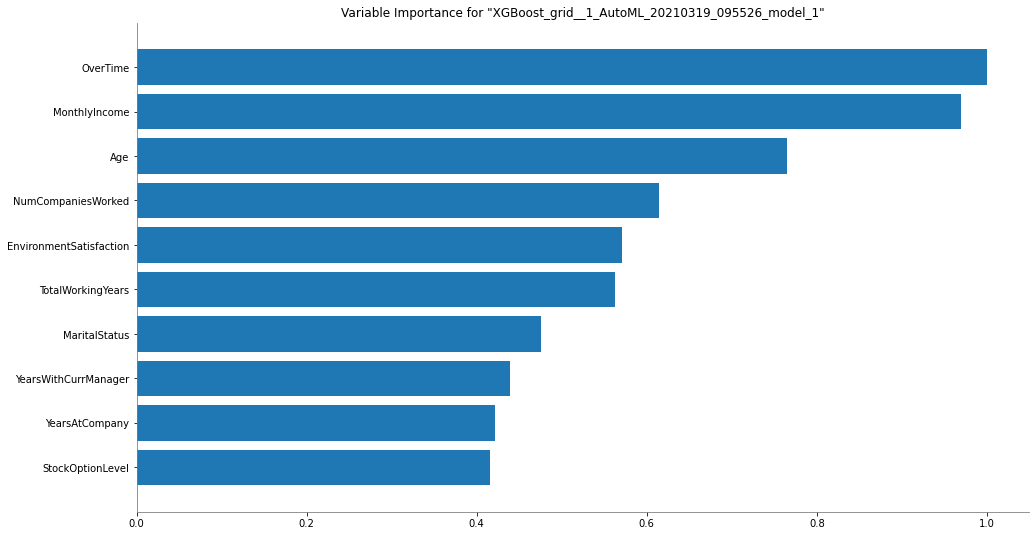

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

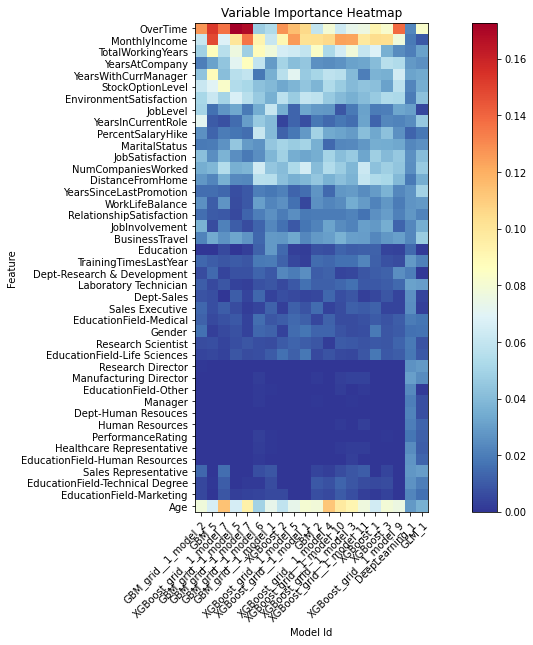

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

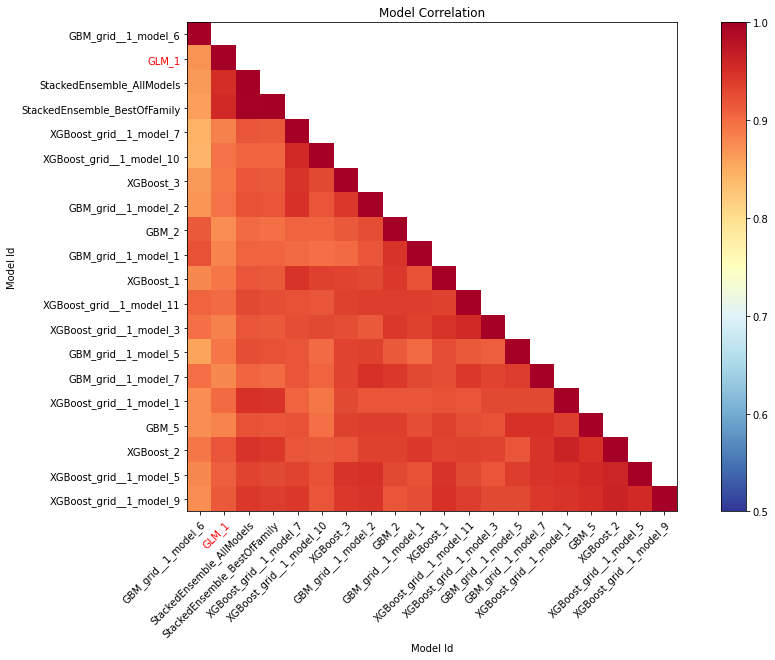

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

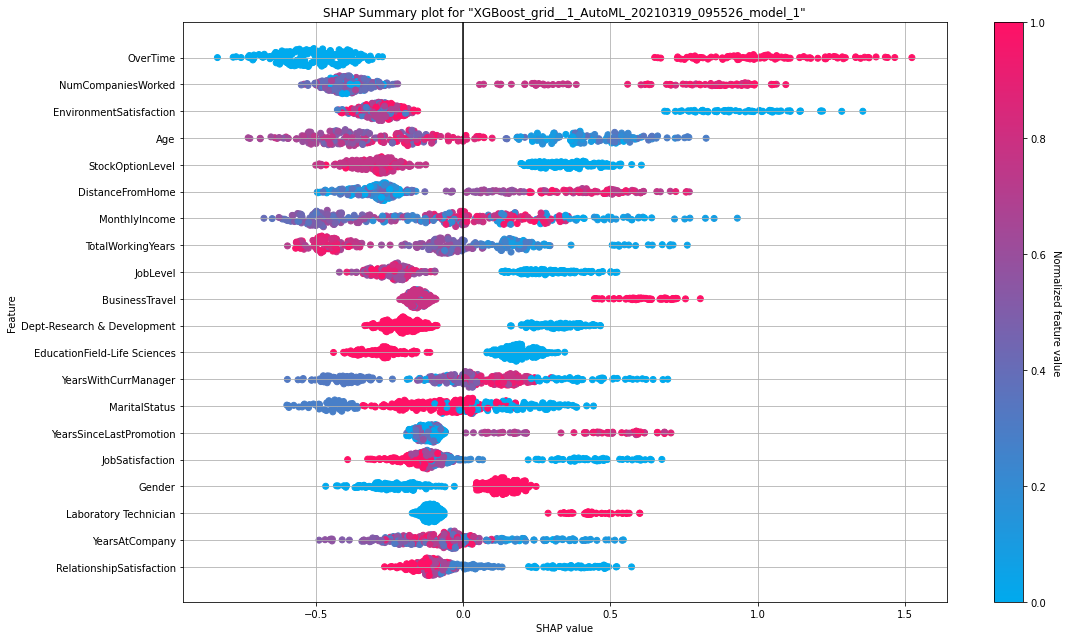

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

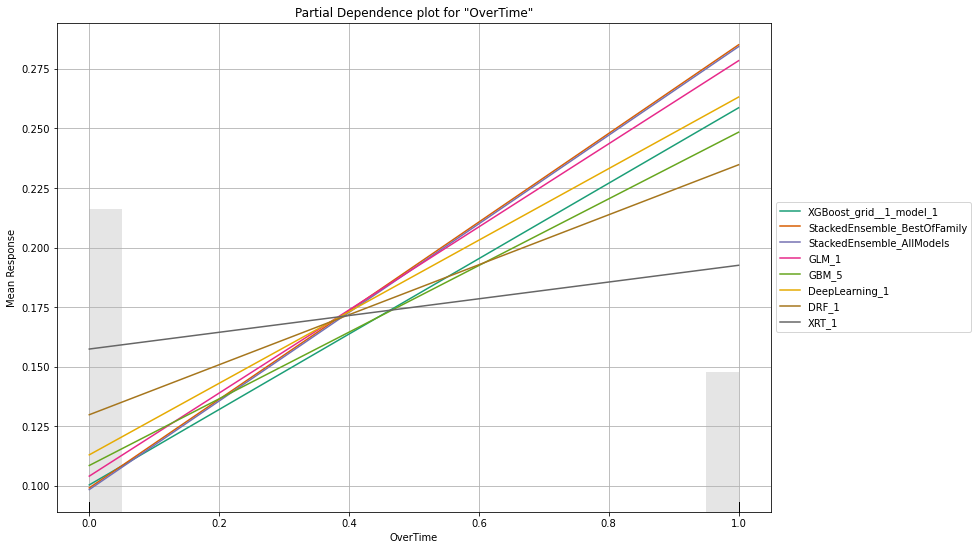

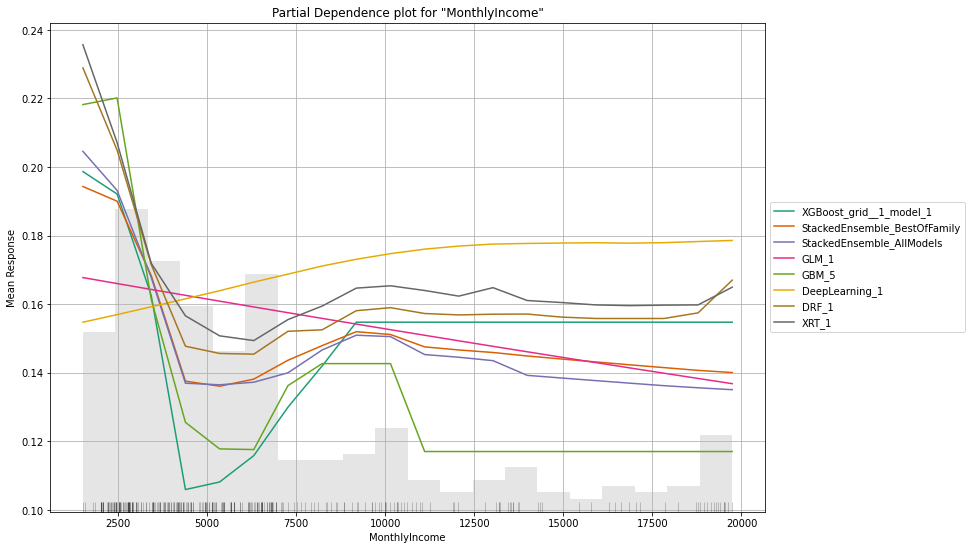

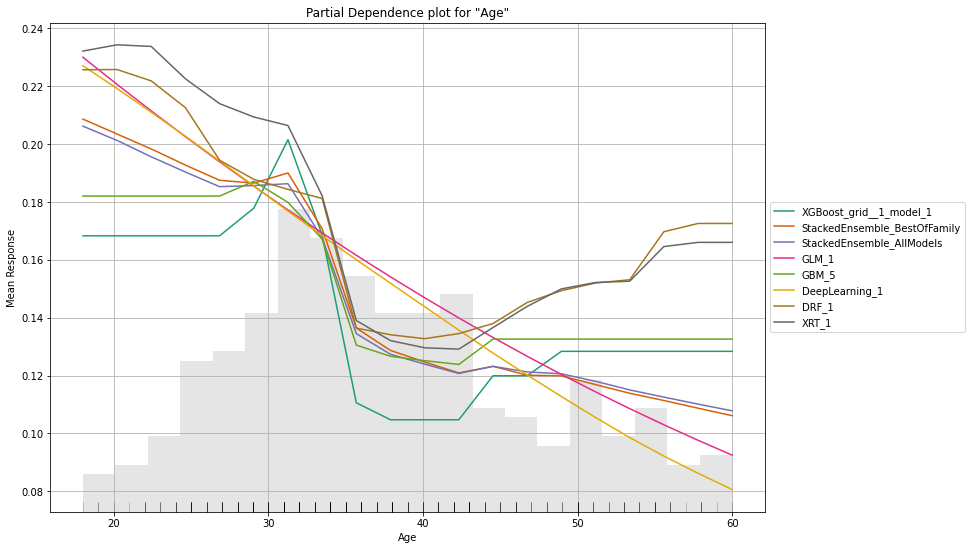

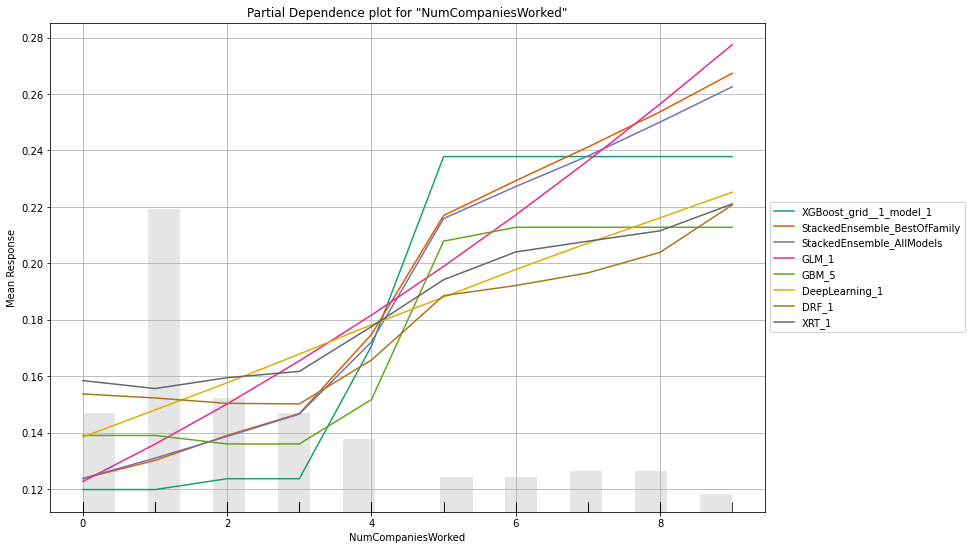

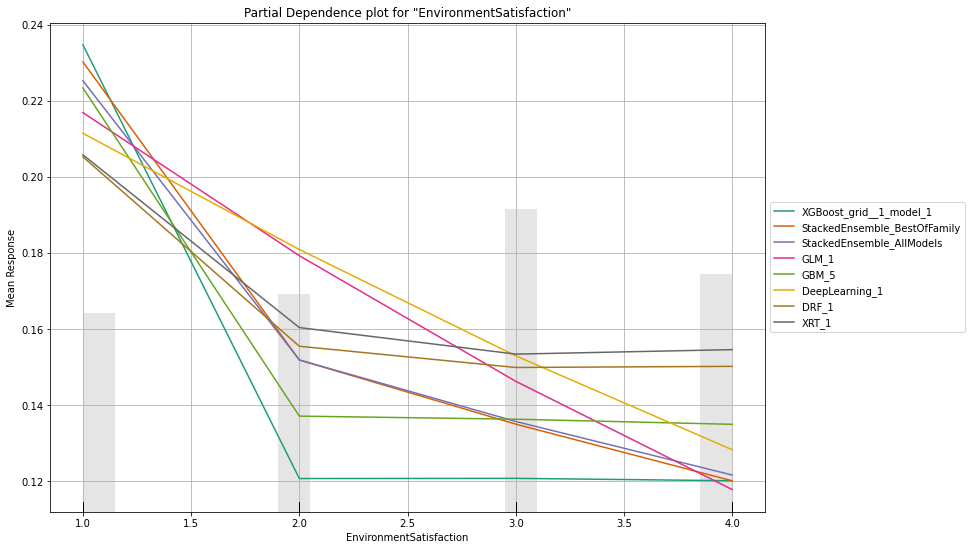

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid__1_AutoML_20210319_095526_model_1,0.837357,0.319802,0.609676,0.238802,0.305811,0.0935202,228,0.015154,XGBoost
StackedEnsemble_BestOfFamily_AutoML_20210319_095526,0.83687,0.301567,0.652458,0.230209,0.295518,0.0873307,500,0.046245,StackedEnsemble
StackedEnsemble_AllModels_AutoML_20210319_095526,0.83056,0.308226,0.636741,0.229186,0.2994,0.0896401,1589,0.86069,StackedEnsemble
XGBoost_grid__1_AutoML_20210319_095526_model_9,0.82997,0.324921,0.606539,0.256299,0.307198,0.0943706,272,0.012445,XGBoost
XGBoost_grid__1_AutoML_20210319_095526_model_5,0.827343,0.325788,0.609031,0.247814,0.306455,0.0939148,266,0.009611,XGBoost
XGBoost_grid__1_AutoML_20210319_095526_model_3,0.822915,0.328112,0.598294,0.228271,0.30941,0.0957348,386,0.026024,XGBoost
GLM_1_AutoML_20210319_095526,0.822277,0.330172,0.628944,0.269102,0.306709,0.0940701,1135,0.02429,GLM
XGBoost_2_AutoML_20210319_095526,0.821109,0.328804,0.589495,0.272386,0.310017,0.0961104,307,0.021896,XGBoost
GBM_5_AutoML_20210319_095526,0.821055,0.337032,0.5835,0.284165,0.316216,0.0999924,1020,0.019256,GBM
GBM_grid__1_AutoML_20210319_095526_model_1,0.820527,0.340547,0.550585,0.270857,0.318563,0.101483,661,0.021161,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid__1_AutoML_20210319_095526_model_1


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32118546962738037: 


,,0,1,Error,Rate
0,0,945.0,43.0,0.0435,(43.0/988.0)
1,1,45.0,143.0,0.2394,(45.0/188.0)
2,Total,990.0,186.0,0.0748,(88.0/1176.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

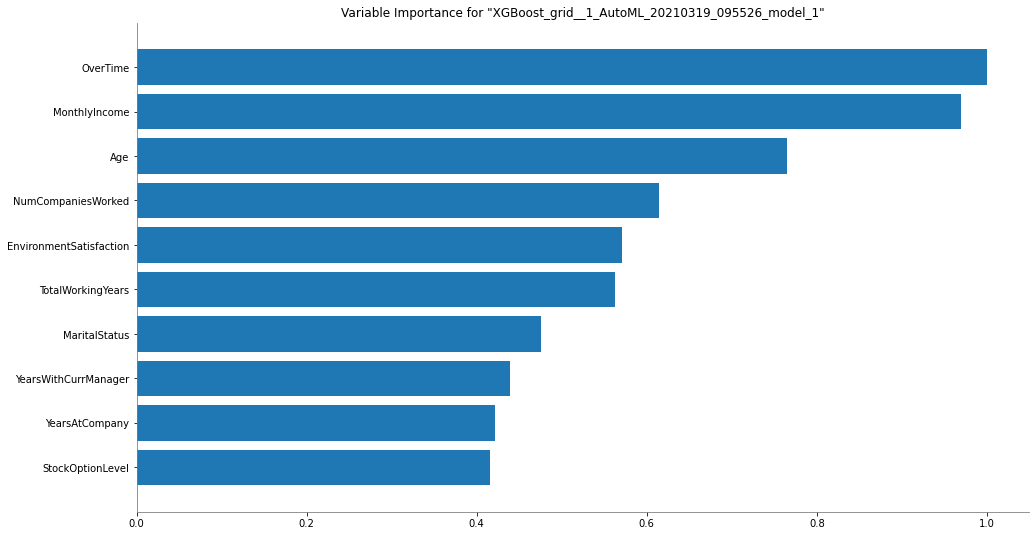

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

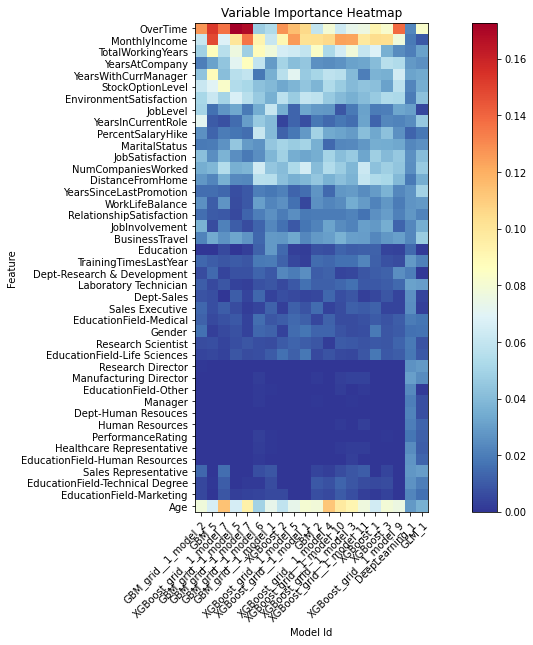

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

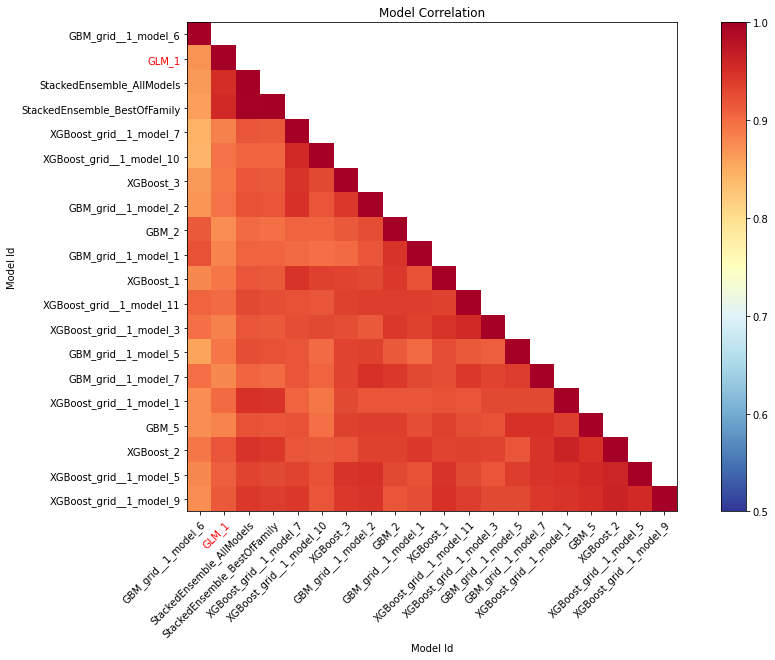

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

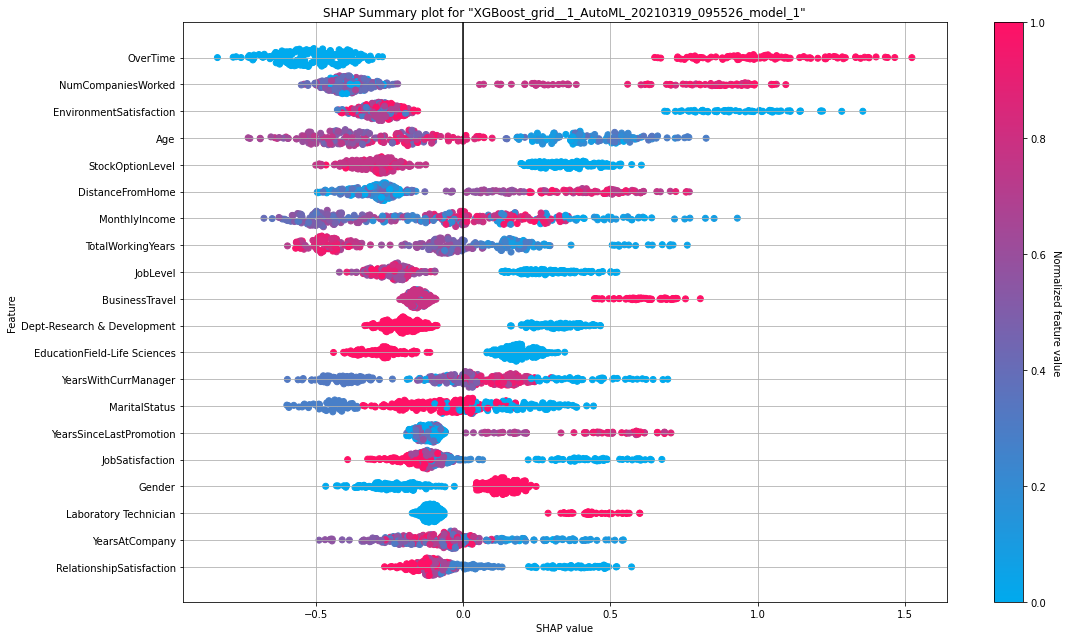

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

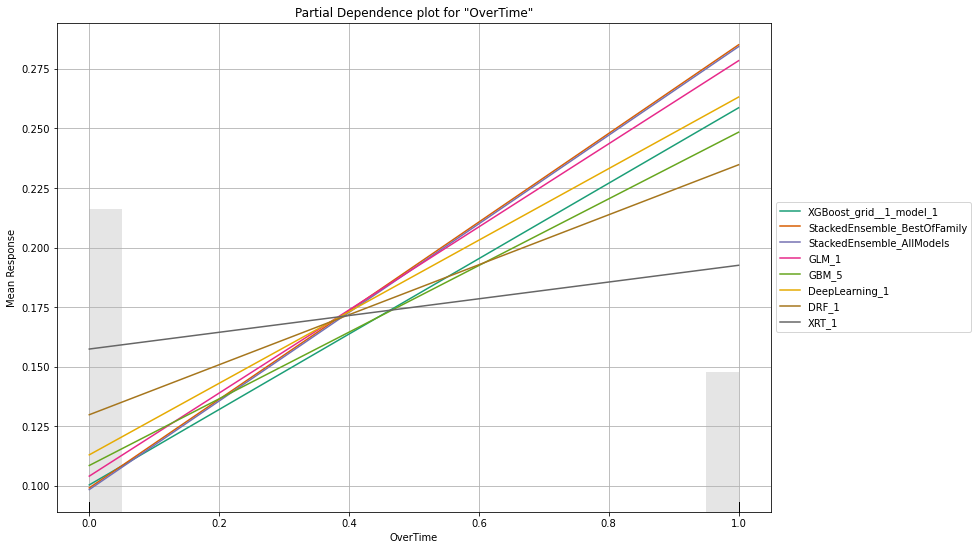

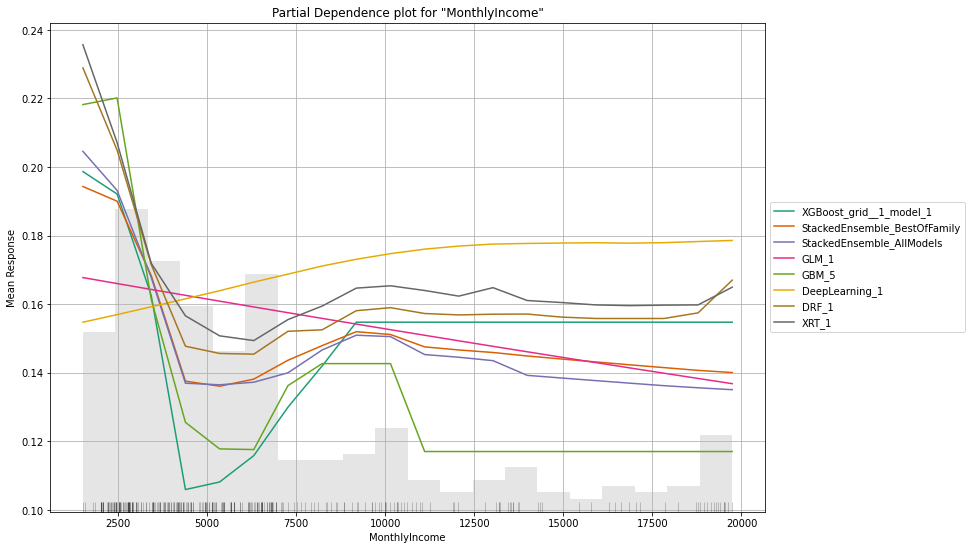

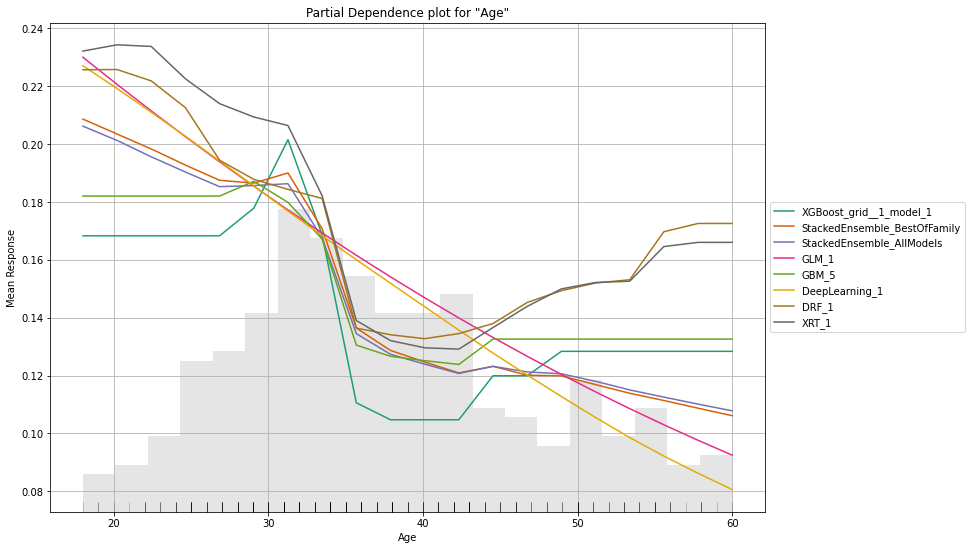

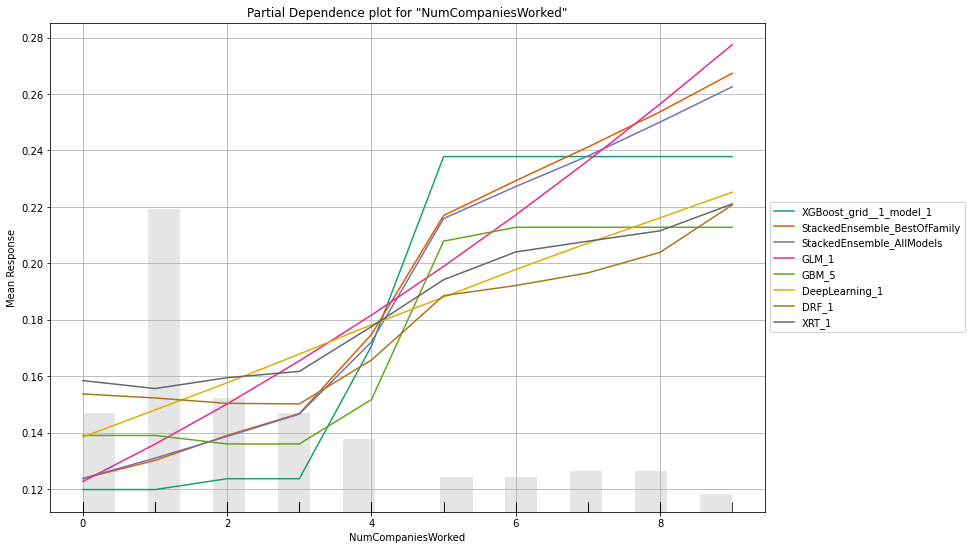

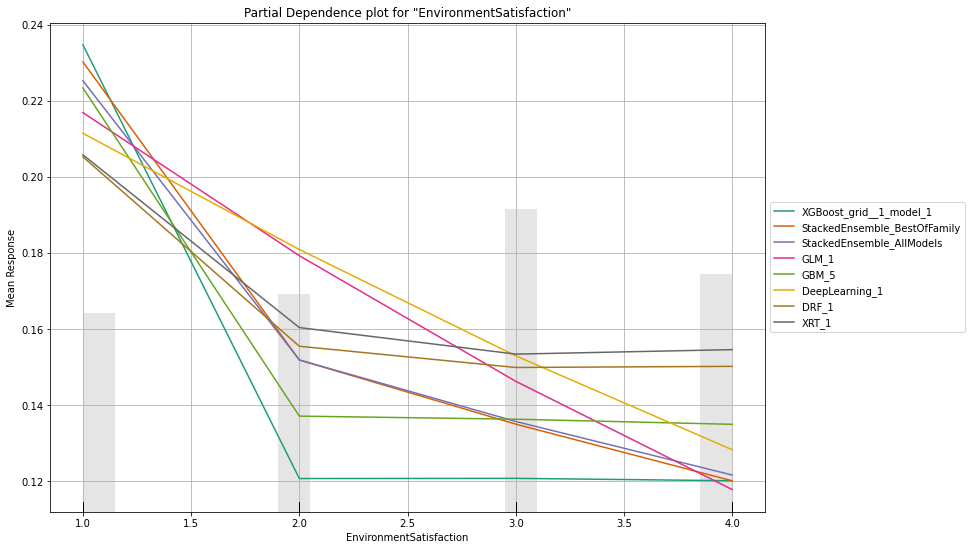

In [125]:
aml.explain(test)